| Выполнил | Группа |
| --- | --- |
| Сальников Данила | ПрИн-367 |

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [59]:
df = pd.read_csv('marketing_campaign.csv', delimiter='	')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [61]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [62]:
(df.isnull().sum()/df.shape[0]*100)['Income']


1.0714285714285714

In [63]:
num_cols=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']


In [64]:
df[num_cols].describe().T
#Средний доход клиентов составляет 52247 долларов, а 2/3 дохода клиентов приходится на сумму от (52247-25173)
#до долларов (52247+25173). Также самый низкий доход клиента составляет 1730 долларов США, а самый высокий доход клиента 
#составляет 666666 долларов США. Также типичный клиент имеет годовой доход в размере 51381 долларов США. У среднего клиента 
#нет детей, а максимальное количество детей у клиентов равно 2. У среднего клиента есть подросток дома (поскольку среднее 
#значение> 0,5), а максимальное количество подростков, принадлежащих к семье клиента, равно 2. Средняя давность составляет 
#49, а максимальное количество дней клиент количество ожиданий с момента последней покупки равно 99, а минимальное значение
#равно 0,50 клиентов ждали около 49 дней с момента последней покупки. Среднее количество денег, потраченных покупателем
#на вино за последние 2 года, составляет 303, на фрукты – 26, на мясные продукты – 166 и на рыбные продукты – 37.
#В среднем покупатель покупает 2 категории, в среднем происходит 5 покупок в магазине. среднее количество покупок
#в Интернете составляет 5. Более того, в среднем 334 человека приняли предложение во 2-й кампании, а наибольшее количество
#покупок произошло в той же 2-й кампании. Также в среднем 21 жалоба поступила от клиентов.


,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


In [65]:
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain']

for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)
    
#В образовании 2-й цикл и Мастер означают одно и то же. Мы можем объединить эти две категории.
#Есть много категорий в семейном положении. Мы можем объединить категорию «Alone» с «Single».
#Из данных неясно, что означают термины «Абсурд» и «YOLO». Объединим эти категории, чтобы создать новую категорию — «Другие».
#Самый распространенный образовательный статус — Graduation.
#Наиболее распространенное семейное положение - Married


Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.990625
1    0.009375
Name: Complain, dt

In [66]:
df["Education"].replace("2n Cycle", "Master", inplace=True)


In [67]:
df["Marital_Status"].replace(["Alone",], "Single", inplace=True)


In [68]:
df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)


In [69]:
df.Marital_Status.value_counts()
#Большинство клиентов относятся к категории женатых, а другая категория имеет только 4 представителя


Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

In [70]:
# total spending by a customer
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

#total purchases made by a customer
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

#total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# Total no. of campaign accepted by a customer
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)


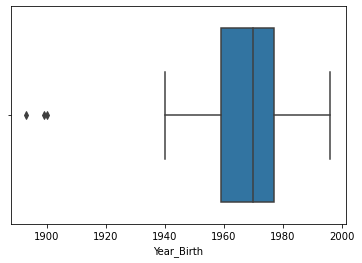

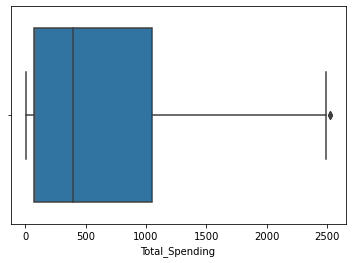

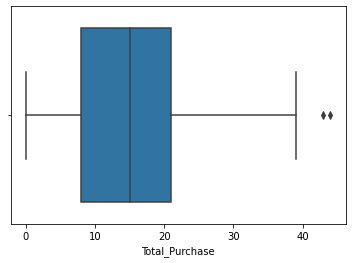

In [71]:
cols=['Year_Birth','Total_Spending','Total_Purchase']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()
    

In [72]:
df[df['Year_Birth'] < 1900]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
239,11004,1893,Master,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,3,11,0,22,4,1,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,0,3,11,0,1853,15,0,1


In [73]:
df = df[df['Year_Birth'] > 1900]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


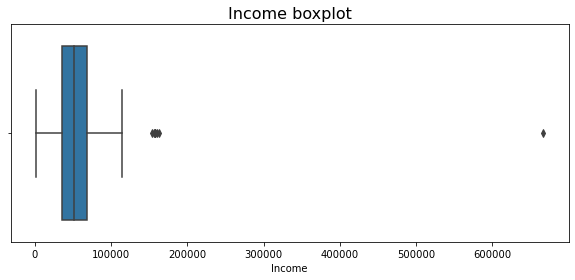

In [74]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()


In [75]:
Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)


118348.5


In [76]:
df[df.Income>upper_whisker]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,3,11,0,1608,37,1,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,0,0,3,11,0,107,1,2,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,3,11,0,6,0,0,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,3,11,0,1717,44,0,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,0,0,3,11,0,59,2,1,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,0,0,0,3,11,0,1730,28,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,3,11,0,8,0,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,3,11,0,62,11,1,0


In [77]:
df[df.Income>upper_whisker].describe().T


,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


In [78]:
df[df.Income<upper_whisker].describe().T
#Ни один из аутсайдеров не принял ни одну из кампаний и не подавал жалоб за последние 2 года.
#Мы видим, что клиенты, которые являются исключениями, имеют более низкие средние расходы на одного покупателя для всех продуктов, кроме мясных продуктов.
#Выбросы имеют большее количество покупок по каталогу в среднем и очень низкое количество покупок через Интернет.
#Мы можем отбросить, так как они не добавят ценности нашему анализу.


,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


In [79]:
df.drop(index=[164, 617, 655, 687, 1300, 1653, 2132, 2233], inplace=True)


Text(3.674999999999997, 0.5, 'count')

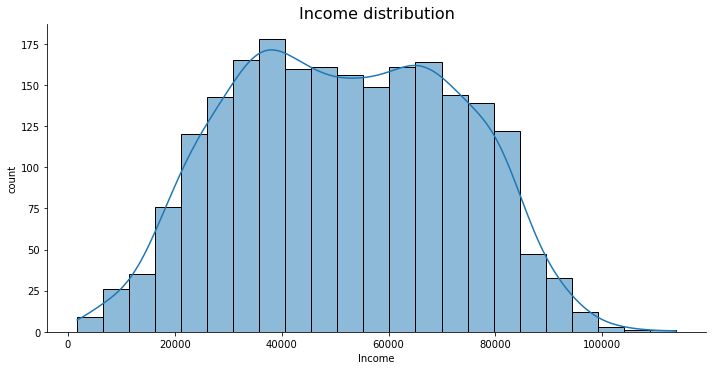

In [80]:
sns.displot(df['Income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=16, )
plt.ylabel('count')


In [86]:
print(df.Income.median())
print(df.Income.mean())


51287.0
51618.48676536563


In [82]:
df['Income'].fillna(df.Income.median(), inplace=True)


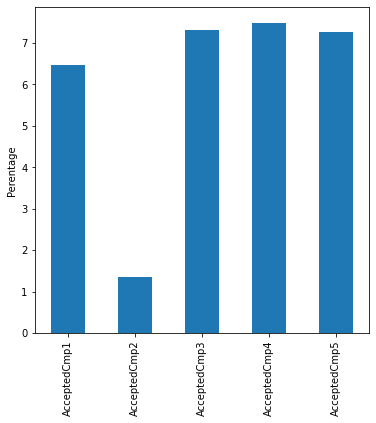

In [83]:
Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


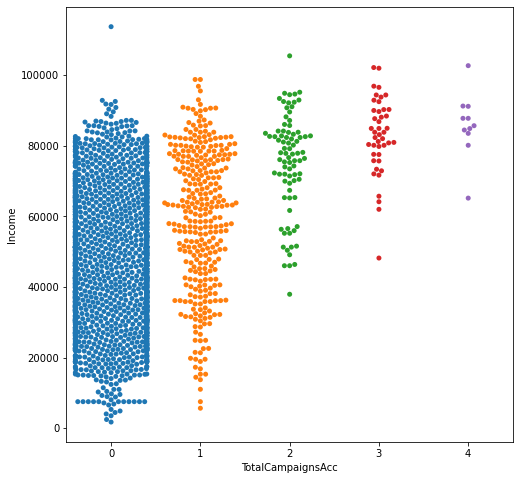

In [84]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='Income', data=df)
plt.show()


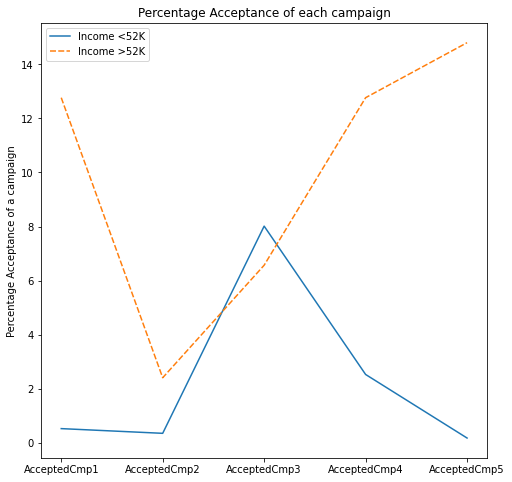

In [88]:
#Средний доход клиентов близок к 52K. 
#Давайте разделим доход на 2 сегмента: доход 52 тыс. и доход 52 тыс. и посмотрим уровень принятия в каждом сегменте.
df1=df[df.Income<52000]
df2=df[df.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()


In [89]:
df[df['AcceptedCmp2']==1].shape


(30, 33)

In [90]:
grouped2=df.groupby('AcceptedCmp2').mean()['TotalCampaignsAcc']
grouped2
#Это означает, что эти 30 клиентов являются теми лояльными клиентами, которые принимают большинство кампаний.


AcceptedCmp2
0    0.262392
1    2.966667
Name: TotalCampaignsAcc, dtype: float64

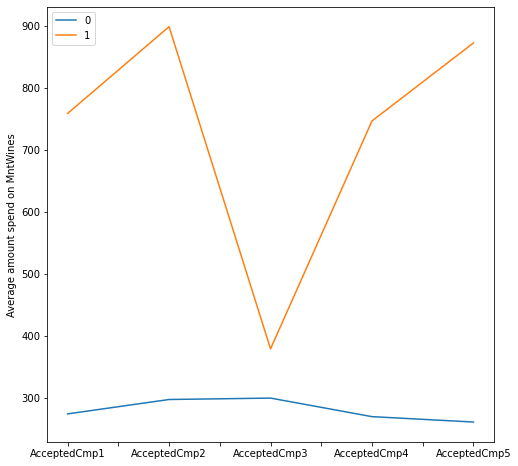

In [93]:
#Возможно, разные кампании ориентированы на разные наборы продуктов
#Проверим, отличаются ли предпочтения продуктов для тех, кто принял кампании, от тех, кто этого не сделал
#используя потраченную сумму и количество покупок.
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()
    
amount_per_campaign('MntWines')


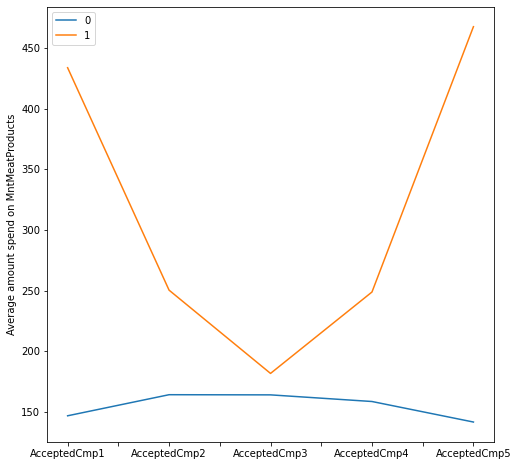

In [94]:
amount_per_campaign('MntMeatProducts')


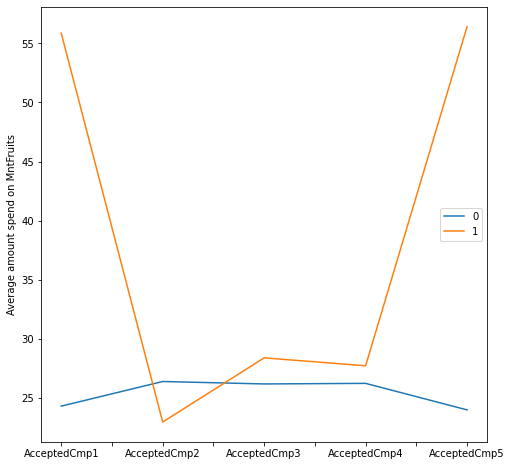

In [95]:
amount_per_campaign('MntFruits')


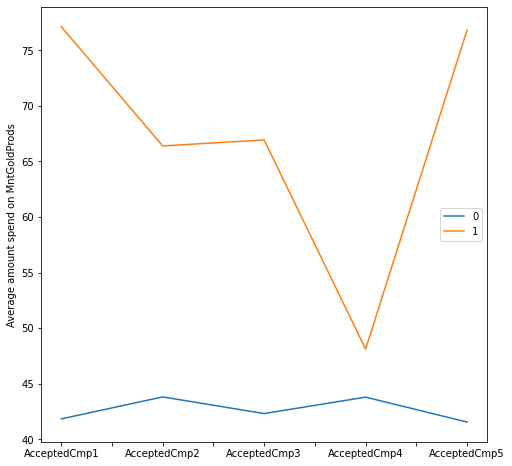

In [96]:
amount_per_campaign('MntGoldProds')


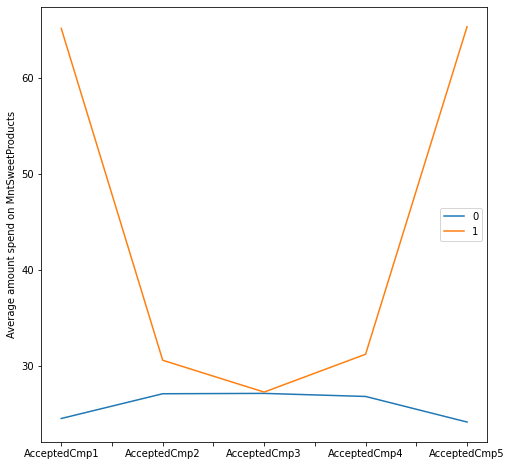

In [97]:
amount_per_campaign('MntSweetProducts')


In [100]:
#Взаимосвязь кампаний с разными категориальными переменными
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    df_new=pd.concat([e1,e2,e3,e4,e5],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()
    

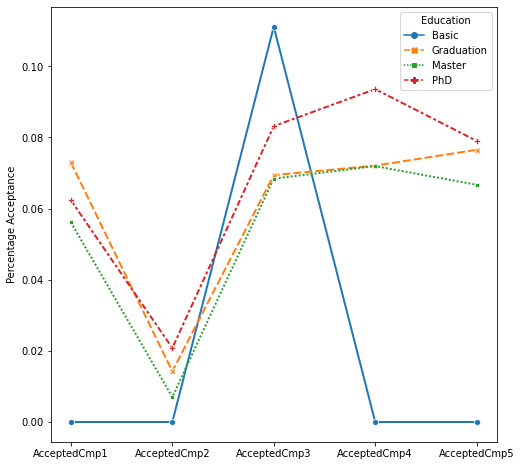

In [101]:
Cat_Campaign_Relation(df, 'Education')


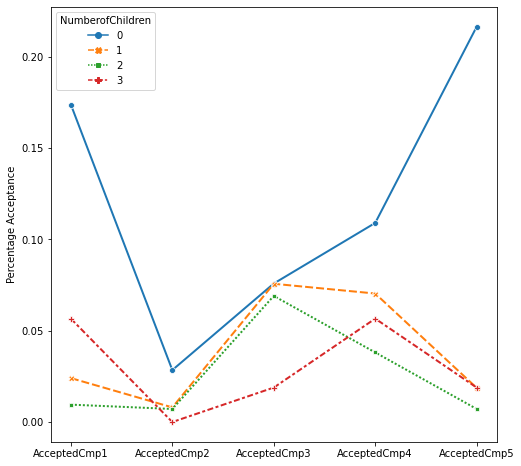

In [102]:
Cat_Campaign_Relation(df, 'NumberofChildren')


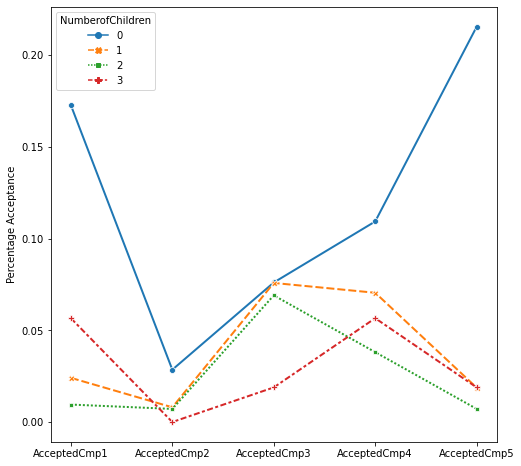

In [103]:
df_rest=df[df.Marital_Status!='Others']
Cat_Campaign_Relation(df_rest, 'NumberofChildren')


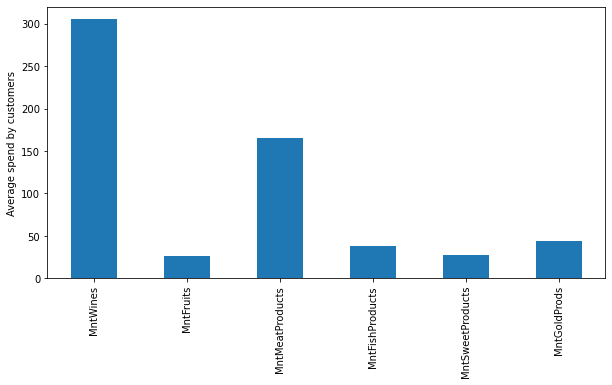

In [105]:
mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()


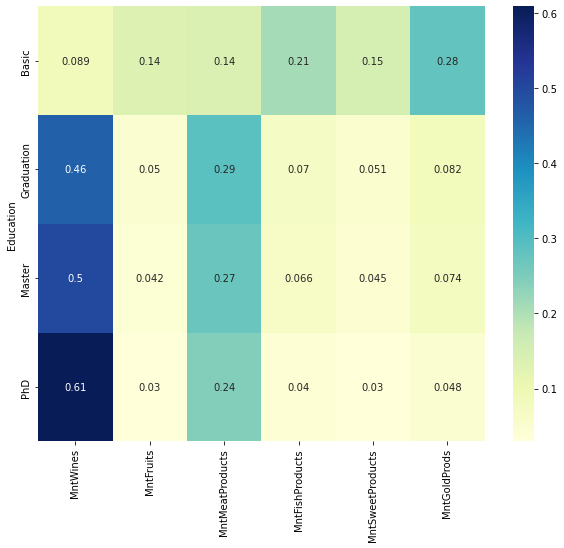

In [107]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()
    
amount_per_category(df, 'Education')


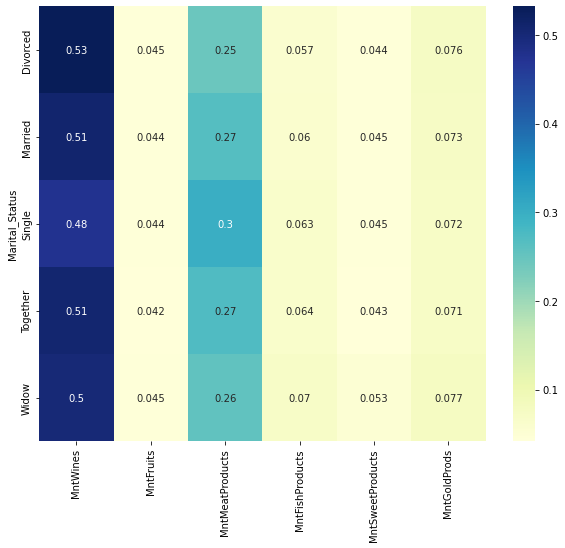

In [108]:
amount_per_category(df_rest, 'Marital_Status')


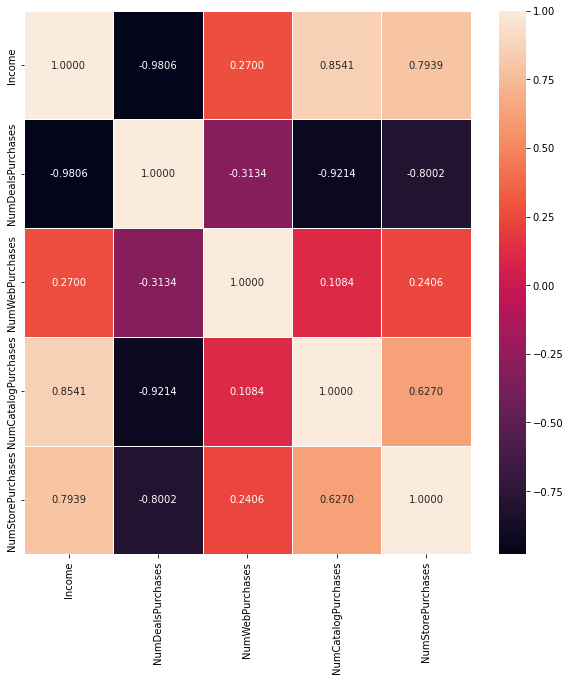

In [110]:
corr=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

corr.corr()

f,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)

plt.show()


Возрастной диапазон клиентов обычно находится между ~ 1960–1980 годами, и осталось очень мало крайних наблюдений
Общие расходы клиентов обычно составляют от 0 до ~ 1000 долларов
Общее количество покупок клиентов обычно составляет от 0 до ~ 20
Распределение доходов близко к нормальному распределению
Чем выше доход, тем выше количество принятых кампаний
Клиенты, которые имеют более высокий уровень принятия кампании, также имеют более высокий уровень расходов на вино
Средняя сумма, потраченная покупателями за последние 2 года, выше всего на вина, за которыми следуют мясные продукты
У аспирантов более высокий уровень приема, в то время как у клиентов базового образования самый низкий уровень приема. За исключением клиентов с базовым уровнем образования, все уровни образования следуют той же тенденции.
Клиенты без детей имеют более высокое признание
Наконец, уровень принятия выше, в основном, когда доход превышает средний доход, дома нет ребенка, сумма, потраченная на вино, больше, чем средняя сумма, потраченная на вино.
